Notebook to generate figure 4 and 5 from the paper

In [1]:
import time
import random
import numpy as np
from BradleyTerry import *

def get_features(n=5):
    feats = []
    for i in range(n):
        feats.append('f'+str(i+1))
    return feats

def gen_strengths(features):
    return {feature: random.random() for feature in features}

def gen_comp(f1, f2, s1, s2):
    if random.random() < abs(s1 - s2):
        f1, f2 = f2, f1
    return '{} > {}\n'.format(f1, f2)

def gen_min_comps(filename, features):
    with open(filename, 'w') as f:
        for feat1 in features:
            for feat2 in features:
                if feat1 != feat2:
                    f.write('{} > {}\n'.format(feat1, feat2))

def add_comps(filename, features, n=None, rs=1):
    if n is None:
        n = len(features) * 50
    n = int(n/(rs*rs))
    feature_names = list(features.keys())
    with open(filename, 'w') as of:
        for _ in range(n):
            r1and2 = random.choices(feature_names, k=rs*2)
            r1 = r1and2[:rs]
            r2 = r1and2[rs:]
            c1 = 0
            for f in r1:
                c1 += features[f]
            c2 = 0
            for f in r2:
                c2 += features[f]
            c1 /= rs
            c2 /= rs
            for f1 in r1:
                for f2 in r2:
                    of.write(gen_comp(f1, f2, c1, c2))
#             f1, f2 = tuple(random.choices(feature_names, k=2))
#             f.write(gen_comp(f1, f2, features[f1], features[f2]))

def populate(nfeats, fname, ncomps=100, rs=1, verbose=False):
    fts = get_features(nfeats)
    st = gen_strengths(fts)
    #gen_min_comps('./data/{}-survey.txt'.format(dataset), st)
    if verbose:
        print(st)
    add_comps('./data/{}-survey.txt'.format(fname), st, n=len(st)*ncomps, rs=rs)
    return fts, st

def extract(features, fname, verbose=False):
    data = FeatureSet(features)
    data.fit('./data/{}-survey.txt'.format(fname))
    if verbose:
        print(data)
    result = []
    for feat in data.features:
        result.append(feat.strength)
    return result
#     with open('./data/{}-weights.csv'.format(fname), 'w') as f:
#         f.write('Feature,Weight\n')
#         for feat in data.features:
#             f.write('{},{}\n'.format(feat.featureName, feat.strength))

def main(params = 5, factor=100, rs=1):
#     print('setting seed')
    random.seed(1)
    
#     print('generating titanic')
    
    fts, st = populate(params, 'titanic', ncomps=factor, rs=rs)
    gst = np.array([st[ft] for ft in fts])
#     print(st)
    n_gst = gst*params / np.sum(gst)
#     print('infering titanic')
    ist = np.array(extract(fts, 'titanic'))
#     print(ist)
    n_ist = ist*params / np.sum(ist)
    err = (n_gst - n_ist)
    return((np.mean(err ** 2)))


if __name__ == '__main__':
    main(factor=500)


In [2]:
rs2 = []
rs2_times = []
for f in [10,20,50,100,200,500,1000]:
    start = time.time()
    rs2.append(main(params=20,factor=f, rs=2))
    rs2_times.append(time.time()-start)
    
rs2

[0.7116476109759986,
 0.4656072636173512,
 0.4051181573616553,
 0.3996183294535472,
 0.4164760958093422,
 0.4262194285280881,
 0.4190232462959207]

In [3]:
rs3 = []
rs3_times = []
for f in [10,20,50,100,200,500,1000]:
    start = time.time()
    rs3.append(main(params=20,factor=f, rs=3))
    rs3_times.append(time.time()-start)
    
rs3

[0.6580738975465016,
 0.6360846478109419,
 0.41401864677656314,
 0.42146176046109785,
 0.4167338239165862,
 0.43613569096024324,
 0.4397711873429291]

In [4]:
rs4 = []
rs4_times = []
for f in [10,20,50,100,200,500,1000]:
    start = time.time()
    rs4.append(main(params=20,factor=f, rs=4))
    rs4_times.append(time.time()-start)
    
rs4

[0.634421262319446,
 0.4381440286174351,
 0.39986007085508735,
 0.3831502059092249,
 0.37953142881338453,
 0.4030245883583182,
 0.3992194021317415]

In [5]:
rs5 = []
rs5_times = []
for f in [10,20,50,100,200,500,1000]:
    start = time.time()
    rs5.append(main(params=20,factor=f, rs=5))
    rs5_times.append(time.time()-start)
    
rs5

[18.37119196351111,
 1.0316717779165159,
 0.547992637755411,
 0.5070245510808693,
 0.44416190540640654,
 0.42505108707765665,
 0.41490925908019005]

In [6]:
rs6 = []
rs6_times = []
for f in [10,20,50,100,200,500,1000]:
    start = time.time()
    rs6.append(main(params=20,factor=f, rs=6))
    rs6_times.append(time.time()-start)
    
rs6

[16.673065246566217,
 0.7598449499877589,
 0.593092804751578,
 0.44601480466644333,
 0.45665052577191717,
 0.42947198128234837,
 0.43103674883812665]

In [7]:
import matplotlib.pyplot as plt

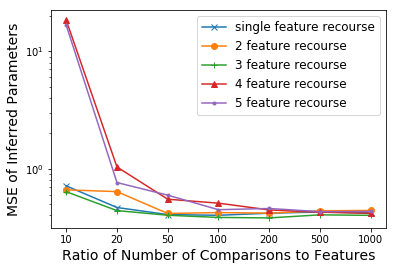

In [8]:
plt.plot([i for i in range(len(rs2))], rs2, marker='x', label='single feature recourse')
plt.plot([i for i in range(len(rs5))], rs3, marker='o', label='2 feature recourse')
plt.plot([i for i in range(len(rs5))], rs4, marker='+', label='3 feature recourse')
plt.plot([i for i in range(len(rs5))], rs5, marker='^', label='4 feature recourse')
plt.plot([i for i in range(len(rs5))], rs6, marker='.', label='5 feature recourse')
plt.legend(fontsize=12)
plt.xticks([i for i in range(len(rs5))], [10,20,50,100,200,500,1000])
plt.xlabel('Ratio of Number of Comparisons to Features', fontsize=14)
plt.ylabel('MSE of Inferred Parameters', fontsize=14)
plt.yscale('log')
# plt.title('Mean Squared Error of Estimated Bradley-Terry Parameters with increasing ')
plt.savefig('fig3.png', dpi=200)

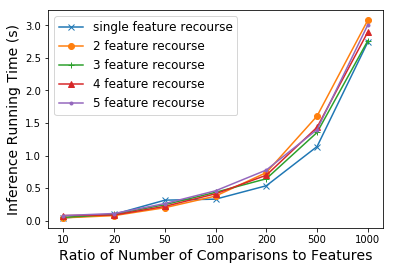

In [9]:
plt.plot([i for i in range(len(rs2))], rs2_times, marker='x', label='single feature recourse')
plt.plot([i for i in range(len(rs5))], rs3_times, marker='o', label='2 feature recourse')
plt.plot([i for i in range(len(rs5))], rs4_times, marker='+', label='3 feature recourse')
plt.plot([i for i in range(len(rs5))], rs5_times, marker='^', label='4 feature recourse')
plt.plot([i for i in range(len(rs5))], rs6_times, marker='.', label='5 feature recourse')
plt.legend(fontsize=12)
plt.xticks([i for i in range(len(rs5))], [10,20,50,100,200,500,1000])
plt.xlabel('Ratio of Number of Comparisons to Features', fontsize=14)
plt.ylabel('Inference Running Time (s)', fontsize=14)
# plt.yscale('log')
# plt.title('Mean Squared Error of Estimated Bradley-Terry Parameters with increasing ')
plt.savefig('fig4.png', dpi=200)